# <b><h1>IEEE-CIS Fraud Detection </h1></b>

<b>Link to the problem:-</b> https://www.kaggle.com/c/ieee-fraud-detection/overview

The following case study contains card transactions data from vesta - e-commerce payment solution provider and we have to use that to identify fraudulent transactions. 

<b>Dataset</b>

<b>a. Train_transaction.csv and Test_transaction.csv -</b> These files contain the details of product being purchased, card used, addresses, emails, amount of transaction etc. 

<b>b. Train_identity.csv and Test_identity.csv - </b>These csv files contain details like device type, device info etc. - named. The identify file does not contain values for each transaction i.e. it has lots of missing data.

<b>Problem statement and Metric:-</b>

We are required to obtain the probability of each transaction being fraud from the dataset and the results will be evaluated on the area under the ROC curve between the predicted probability and the observed target.

#Downloading and unzipping data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.colab import drive

drive.mount('/content/drive')            #mounting google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/              

/content/drive/MyDrive


In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c ieee-fraud-detection

test_identity.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_identity.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_transaction.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test_transaction.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile('train_transaction.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

with zipfile.ZipFile('test_transaction.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

with zipfile.ZipFile('train_identity.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

with zipfile.ZipFile('test_identity.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

#Merging Data and Data balance

In [ ]:
pd.set_option('max_columns', None)                     #setting max columns to be shown to maximum

In [ ]:
train_transactions = pd.read_csv('train_transaction.csv')
test_transactions = pd.read_csv('test_transaction.csv')

In [ ]:
train_identity = pd.read_csv('train_identity.csv')
test_identity = pd.read_csv('test_identity.csv')

In [ ]:
train = train_transactions.merge(train_identity, on='TransactionID', how='left')           #merging train transactions and identity csvs on TransactionID
test = test_transactions.merge(test_identity, on='TransactionID', how='left')

In [ ]:
test.columns = [c.replace('-', '_') for c in test.columns]                     #replacing _ with - to make column names similar

In [ ]:
test.head(4)

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224           31.95         W  10409  111.0   
1        3663550       18403263           49.00         W   4272  111.0   
2        3663551       18403310          171.00         W   4476  574.0   
3        3663552       18403310          284.95         W  10989  360.0   

   card3 card4  card5  card6  addr1  addr2   dist1  dist2 P_emaildomain  \
0  150.0  visa  226.0  debit  170.0   87.0     1.0    NaN     gmail.com   
1  150.0  visa  226.0  debit  299.0   87.0     4.0    NaN       aol.com   
2  150.0  visa  226.0  debit  472.0   87.0  2635.0    NaN   hotmail.com   
3  150.0  visa  166.0  debit  205.0   87.0    17.0    NaN     gmail.com   

  R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  \
0           NaN  6.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0  6.0  0.0  5.0  1.0   
1           NaN  3.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0  2.0  0.0  1.0  1.0   
2           NaN  2.0  2.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  0.0  2.0  0.0   
3           NaN  5.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0  0.0  2.0  0.0   

     C13  C14     D1     D2    D3     D4    D5  D6  D7  D8  D9    D10    D11  \
0  115.0  6.0  419.0  419.0  27.0  398.0  27.0 NaN NaN NaN NaN  418.0  203.0   
1   12.0  2.0  149.0  149.0   7.0  634.0   7.0 NaN NaN NaN NaN  231.0  634.0   
2   22.0  2.0  137.0  137.0  10.0   97.0  10.0 NaN NaN NaN NaN  136.0  136.0   
3    7.0  4.0   42.0   42.0  41.0  242.0  41.0 NaN NaN NaN NaN  242.0  242.0   

   D12  D13  D14    D15 M1 M2 M3   M4   M5 M6   M7   M8   M9   V1   V2   V3  \
0  NaN  NaN  NaN  409.0  T  T  F  NaN  NaN  F    T    T    T  1.0  1.0  1.0   
1  NaN  NaN  NaN  634.0  T  F  F   M0  NaN  F  NaN  NaN  NaN  1.0  1.0  1.0   
2  NaN  NaN  NaN   97.0  T  T  F   M0    F  F    F    F    F  1.0  1.0  1.0   
3  NaN  NaN  NaN  242.0  T  T  T  NaN  NaN  T  NaN  NaN  NaN  1.0  1.0  1.0   

    V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  2.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

   V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  \
0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
3  0.0  2.0  2.0  2.0  2.0  0.0  0.0  1.0  0.0  0.0  2.0  2.0  2.0  2.0  1.0   

   V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  \
0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
3  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   

   V64  V65  V66  V67  V68  V69  V70  V71  V72  V73  V74  V75  V76  V77  V78  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0   
2  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  2.0  1.0  2.0   
3  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0   

   V79  V80  V81  V82  V83  V84  V85  V86  V87  V88  

In [ ]:
train['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

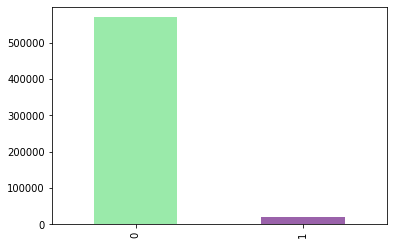

In [ ]:
train['isFraud'].value_counts().plot.bar(color=['#9AEAAA','#9A62AA'])

AUC is the given metric in the Kaggle problem for this data but AUC might not be an appropriate measure as the dataset is imbalanced. 

F1-score might be a better here since it takes into account Precision (Precision = TruePositive/(FalsePositive + TruePositive)) and Recall (Recall = TruePositive/(FalseNegative + TruePositive)). F1 will also help us address both FalsePositives and FalseNegatives as both would not be desirable. 



# Percentage missing values 

In [ ]:
percent_missing = train.isnull().sum() * 100 / len(train)                        #calculating percentage missing values in columns and then making a dataframe from it
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

In [ ]:
miss = missing_value_df.reset_index()

In [ ]:
miss = miss.drop('index', axis=1)

In [ ]:

len(miss)

434

In [ ]:
miss[0:100]

column_name  percent_missing
0        id_24        99.196159
1        id_25        99.130965
2        id_07        99.127070
3        id_08        99.127070
4        id_21        99.126393
..         ...              ...
95        V274        77.913435
96        V275        77.913435
97        V276        77.913435
98        V265        77.913435
99        V260        77.913435

[100 rows x 2 columns]

In [ ]:
miss[99:200]

column_name  percent_missing
99         V260        77.913435
100        V247        77.913435
101        V246        77.913435
102        V240        77.913435
103        V237        77.913435
..          ...              ...
195        V239        76.053104
196        V227        76.053104
197        V250        76.053104
198        V272        76.053104
199        V270        76.053104

[101 rows x 2 columns]

In [ ]:
miss[199:250]

column_name  percent_missing
199        V270        76.053104
200        V251        76.053104
201        V220        76.053104
202        V255        76.053104
203        V256        76.053104
204        V259        76.053104
205        V221        76.053104
206       id_01        75.576083
207       id_12        75.576083
208       dist1        59.652352
209          M5        59.349409
210          M7        58.635317
211          M9        58.633115
212          M8        58.633115
213          D5        52.467403
214          M4        47.658753
215          D2        47.549192
216          V3        47.293494
217          V9        47.293494
218          V5        47.293494
219         V11        47.293494
220         V10        47.293494
221          V8        47.293494
222          V7        47.293494
223         D11        47.293494
224          V6        47.293494
225          V4        47.293494
226          V2        47.293494
227          V1        47.293494
228          M2        45.907136
229          M3        45.907136
230          M1        45.907136
231          D3        44.514851
232          M6        28.678836
233         V35        28.612626
234         V40        28.612626
235         V41        28.612626
236         V39        28.612626
237         V38        28.612626
238         V51        28.612626
239         V37        28.612626
240         V52        28.612626
241         V36        28.612626
242         V50        28.612626
243         V48        28.612626
244         V42        28.612626
245         V43        28.612626
246         V44        28.612626
247         V46        28.612626
248         V47        28.612626
249         V45        28.612626

#Removing columns with more than 75% NaN values and making list of categorical and real value columns

In [ ]:
not_null = miss.loc[miss['percent_missing'] < 75]                   #dropping all the columns with missing values more than 75%
len(not_null)

226

In [ ]:

cols = not_null['column_name']
len(cols)

226

In [ ]:
num_cols = train[cols]._get_numeric_data().columns
len(num_cols)

213

In [ ]:
num_cols = train[cols]._get_numeric_data().columns                                  #getting the categorical columns 
cat = list(set(cols) - set(num_cols))
cat

['M7',
 'M5',
 'card4',
 'M9',
 'P_emaildomain',
 'M2',
 'M1',
 'card6',
 'M3',
 'ProductCD',
 'M4',
 'M8',
 'M6']

In [ ]:
more_cat = ['id_22', 'M3', 'card5', 'addr1', 'M9', 'id_18', 'id_32', 'addr2', 'id_13', 'id_20', 'id_24', 'M6', 
            'id_19', 'id_21', 'card2', 'M1', 'id_14', 'M5', 'card1', 'M2', 'id_25', 'M8', 'id_17', 'M7', 'id_26', 'card3'] #few other categorical columns that were present in the dataframe

In [ ]:
for i in more_cat:                                     #appending categorical list if feature is present in column list
  if i in cols:
    cat.append(i)

In [ ]:
for i in more_cat:                                     #removing categorical features from numerical columns list
  if i in cols and i in num_cols:
    num_cols.remove(i)

In [ ]:
num_cols = num_cols.to_list()

In [ ]:
len(cat), len(num_cols)

(13, 213)

In [ ]:
perc = train[cat].isnull().sum() * 100 / len(train)                    #checking missing percentage in categorical features
missin = pd.DataFrame({'column_name': cat,
                                 'percent_missing': perc})

In [ ]:
missin

column_name  percent_missing
M7                        M7        58.635317
M5                        M5        59.349409
card4                  card4         0.267044
M9                        M9        58.633115
P_emaildomain  P_emaildomain        15.994852
M2                        M2        45.907136
M1                        M1        45.907136
card6                  card6         0.266028
M3                        M3        45.907136
ProductCD          ProductCD         0.000000
M4                        M4        47.658753
M8                        M8        58.633115
M6                        M6        28.678836

In [ ]:
num_cols.remove('TransactionID')                       #removing the identity features
num_cols.remove('TransactionDT')
num_cols.remove('isFraud')

#Barplot of categorical variables

In [ ]:
def barplot(train, feature):
      fea = ''.join(feature)
      sns.barplot(x=fea, y=train.index, hue='isFraud', data=train)
      plt.xlabel("Categories")
      plt.ylabel("Frequency")
      plt.title("Bar plot of" + ' ' + fea)
      plt.show()

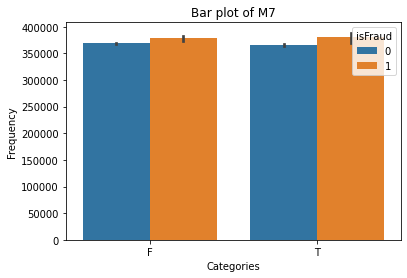

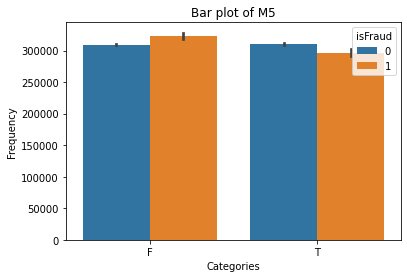

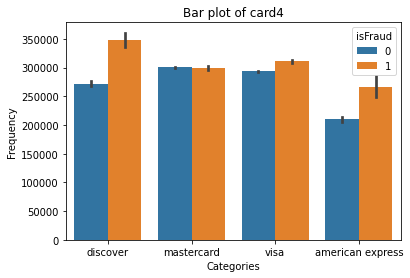

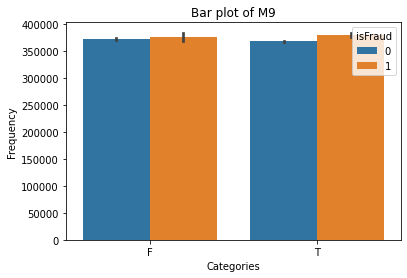

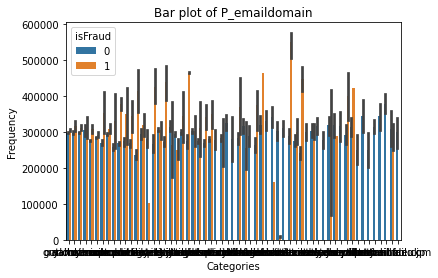

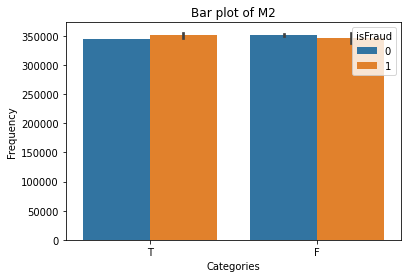

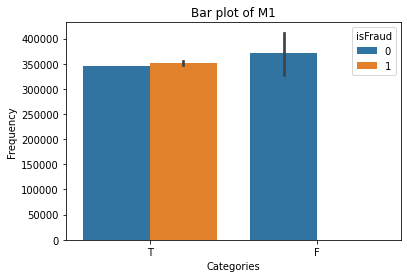

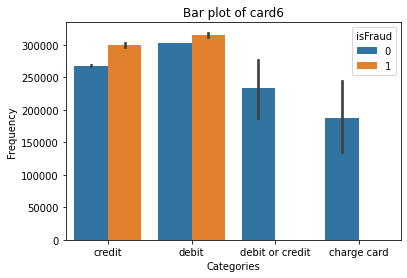

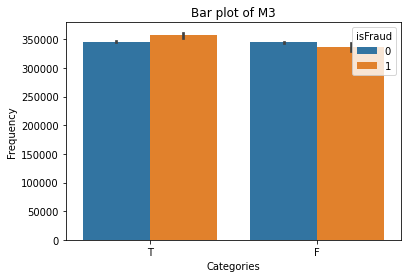

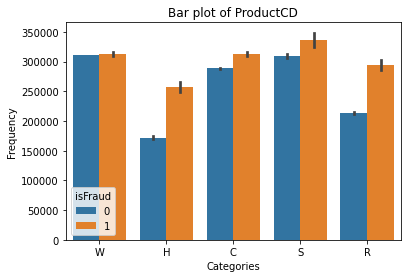

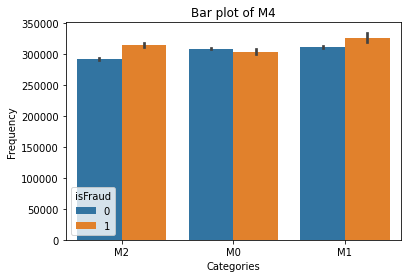

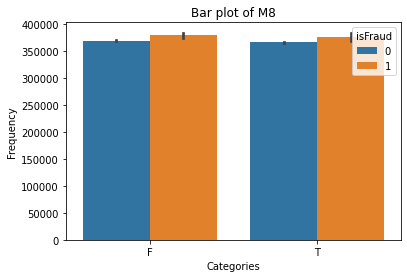

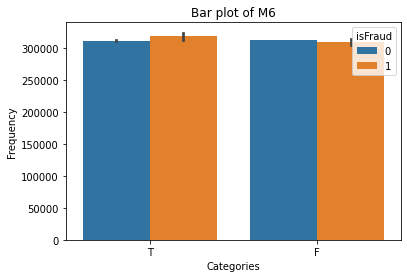

In [ ]:
for yy in cat:
   barplot(train, yy)

- M2	:- miss% -45.907136, Both the categories are almost equally classified into fraud and not fraud, <b> NAN filling strategy - MICE </b>
- M5	:- miss% -59.349409, Both the categories are almost equally classified into fraud and not fraud, <b> NAN filling strategy - New categorical variable </b>
- M3	:- miss% -45.907136, Both the categories are almost equally classified into fraud and not fraud, <b> NAN filling strategy - MICE </b>
- P_emaildomain	:- miss% -15.994852, All the categories are almost equally classified into fraud and not fraud, <b> NAN filling strategy - Mode </b>
- card6	:- miss% -0.266028, debit or credit & charge cards - are never classified into fraud : debit & credit - are equally classified into fraud, <b>NAN filling strategy -  MICE </b>
- M6	:- miss% -28.678836, Both the categories are almost equally classified into fraud and not fraud, <b> NAN filling strategy - MICE </b>
- M4	:- miss% -47.658753, All the three categories are almost equally classified into fraud and not fraud, <b> NAN filling strategy - MICE</b>
- ProductCD	:- miss% -0.000000, All the categories are almost equally classified into fraud and not fraud, <b> NAN filling strategy - None </b>
- M1	:- miss% -45.907136, F - never classified into fraud : T - equally classified into fraud and not fraud, <b> NAN filling strategy - MICE </b>
- M7	:- miss% -58.635317, Both the categories are almost equally classified into fraud and not fraud, <b> NAN filling strategy - New categorical variable </b>
- card4	:- miss% -0.267044, All the categories are almost equally classified into fraud and not fraud, <b> NAN filling strategy - MICE </b>
- M9	:- miss% -58.633115, Both the categories are almost equally classified into fraud and not fraud, <b> NAN filling strategy - New categorical variable </b>
- M8	:- miss% -58.633115, Both the categories are almost equally classified into fraud and not fraud, <b> NAN filling strategy - New categorical variable </b>



#Imputing NaN values (categorical)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imputor = IterativeImputer(max_iter=5)

In [ ]:
mice_list = ['M2', 'M3', 'card6', 'card4', 'M6', 'M4', 'M1']

In [ ]:
train.loc[:,cat] = (train[cat].apply(lambda x: pd.factorize(x)[0]))         #label encoding 

In [ ]:
test.loc[:,cat] = (test[cat].apply(lambda x: pd.factorize(x)[0]))

In [ ]:
imputor.fit(train[mice_list])

IterativeImputer(max_iter=5)

In [ ]:
train.loc[:,mice_list] = imputor.transform(train[mice_list])

In [ ]:
test.loc[:,mice_list] = imputor.transform(test[mice_list])

In [ ]:
new_var = ['M9', 'M8', 'M7', 'M5']     #will make new variable for NaN for these features

In [ ]:
for po in new_var:
   nan_var = train[po].max() + 1
   train.loc[:,po] = train[po].fillna(nan_var)

In [ ]:
for po in new_var:
   nan_var = train[po].max() + 1
   test.loc[:,po] = test[po].fillna(nan_var)

In [ ]:
train.loc[:,'P_emaildomain'] = train['P_emaildomain'].fillna(train['P_emaildomain'].mode())   #filling NaN with mode
test.loc[:,'P_emaildomain'] = test['P_emaildomain'].fillna(train['P_emaildomain'].mode())

#Univariate Analysis (numerical)

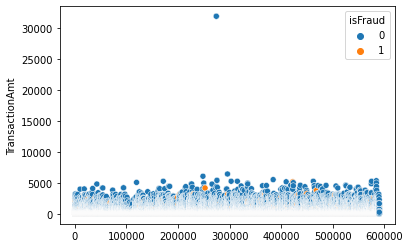

In [ ]:
sns.scatterplot(x=train.index, y='TransactionAmt', hue='isFraud', data=train)

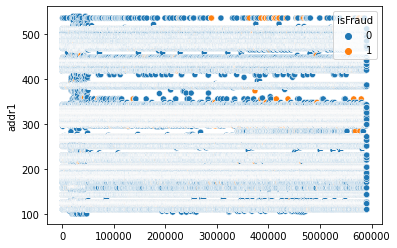

In [ ]:
sns.scatterplot(x=train.index, y='addr1', hue='isFraud', data=train)

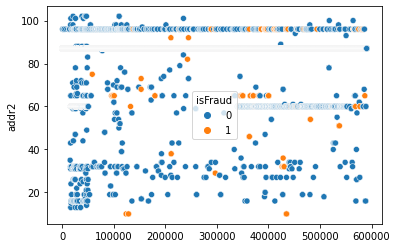

In [ ]:
sns.scatterplot(x=train.index, y='addr2', hue='isFraud', data=train)

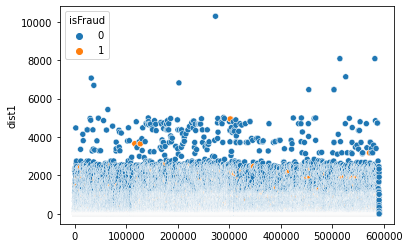

In [ ]:
sns.scatterplot(x=train.index, y='dist1', hue='isFraud', data=train)

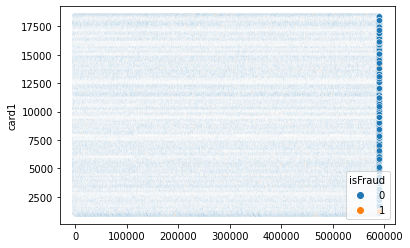

In [ ]:
sns.scatterplot(x=train.index, y='card1', hue='isFraud', data=train)

#Imputing NaN values (numeric) with MICE

In [ ]:
cols = cols.to_list()

In [ ]:
cols.remove('isFraud')

In [ ]:
imputor3 = IterativeImputer(max_iter=5)

In [ ]:
imputor3.fit(train[cols])

IterativeImputer(max_iter=5)

In [ ]:
train.loc[:,cols] = imputor3.transform(train[cols])

In [ ]:
test.loc[:,cols] = imputor3.transform(test[cols])

In [ ]:
train[cols].to_csv('imputed_train_f.csv', index=False)
test[cols].to_csv('imputed_test_f.csv', index=False)

#Heatmaps

In [ ]:
train[cols]

dist1   M5   M7   M9   M8         D5   M4          D2        V3  \
0        19.000000  0.0 -1.0 -1.0 -1.0  13.588747  0.0   11.862604  1.000000   
1       992.074678  1.0 -1.0 -1.0 -1.0  44.633612  1.0   -1.743360  1.036027   
2       287.000000  0.0  0.0  0.0  0.0  38.217374  1.0   -0.226874  1.000000   
3       982.868219  1.0 -1.0 -1.0 -1.0   0.000000  1.0  112.000000  0.958588   
4       333.493829 -1.0 -1.0 -1.0 -1.0  59.657325 -1.0    4.984074  0.457296   
...            ...  ...  ...  ...  ...        ...  ...         ...       ...   
590535   48.000000  1.0  0.0  1.0  0.0  39.001780  1.0   29.000000  1.000000   
590536  564.824597  0.0  0.0  0.0  0.0  50.316026  1.0    1.111817  1.000000   
590537  484.194059 -1.0 -1.0 -1.0 -1.0  34.643139 -1.0    5.753535  1.000000   
590538    3.000000  0.0 -1.0 -1.0 -1.0   0.000000  1.0   22.000000  1.000000   
590539  569.740661 -1.0  0.0  0.0  0.0   0.000000 -1.0  -13.496474  1.000000   

              V9        V5       V11       V10        V8        V7  \
0       1.000000  1.000000  0.000000  0.000000  1.000000  1.000000   
1       1.035928  0.989826  0.143987  0.105146  1.020837  1.040761   
2       1.000000  1.000000  0.000000  0.000000  1.000000  1.000000   
3       0.917667  1.188325  0.143652  0.087401  0.938197  1.041482   
4       0.817725  3.863512  0.793404  0.409546  0.339994  0.946070   
...          ...       ...       ...       ...       ...       ...   
590535  1.000000  0.000000  0.000000  0.000000  1.000000  1.000000   
590536  1.000000  1.000000  0.000000  0.000000  1.000000  1.000000   
590537  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
590538  1.000000  2.000000  0.000000  0.000000  1.000000  1.000000   
590539  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

               D11        V6        V4        V2        V1   M2   M3   M1  \
0        13.000000  1.000000  1.000000  1.000000  1.000000  0.0  0.0  0.0   
1       -88.050574  1.025039  0.987241  1.019548  1.000048 -1.0 -1.0 -1.0   
2       315.000000  1.000000  1.000000  1.000000  1.000000  0.0  0.0  0.0   
3        78.761785  1.051297  1.019671  0.985111  0.999819 -1.0 -1.0 -1.0   
4       896.743429  0.260652  1.657543  0.268425  0.995398 -1.0 -1.0 -1.0   
...            ...       ...       ...       ...       ...  ...  ...  ...   
590535   56.000000  1.000000  0.000000  1.000000  1.000000  0.0  0.0  0.0   
590536    0.000000  1.000000  1.000000  1.000000  1.000000  1.0  1.0  0.0   
590537    0.000000  1.000000  1.000000  1.000000  1.000000  1.0  1.0  0.0   
590538   22.000000  1.000000  2.000000  1.000000  1.000000  0.0  0.0  0.0   
590539    0.000000  1.000000  1.000000  1.000000  1.000000  1.0  1.0  0.0   

               D3   M6       V35       V40       V41       V39       V38  \
0       13.000000  0.0  0.880508  0.156139  1.000434  0.144472  1.156843   
1       39.209980  0.0  0.000000  0.000000  1.000000  0.000000  1.000000   
2       24.982132  1.0  1.000000  0.000000  1.000000  0.000000  1.000000   
3        0.000000  1.0  1.000000  0.000000  1.000000  0.000000  1.000000   
4       51.951785 -1.0  0.514855  0.175290  0.983223  0.183951  1.143408   
...           ...  ...       ...       ...       ...       ...       ...   
590535  30.000000  1.0  1.237300  0.171035  1.000709  0.153131  1.173737   
590536  38.056351  0.0  1.000000  0.000000  1.000000  0.000000  1.000000   
590537  25.151447  0.0  1.000000  0.000000  1.000000  0.000000  1.000000   
590538   0.000000  0.0  1.000000  0.000000  1.000000  0.000000  1.000000   
590539   0.000000  0.0  2.000000  0.000000  1.000000  0.000000  1.000000   

             V51       V37       V52       V36       V50       V48       V42  \
0       0.052588  1.118844  0.057840  0.924982  0.028086  0.100961  0.094365   
1       0.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2       0.000000  1.000000  0.000000  1.000000  0.000000  0.000000  0.000000   
3       0.000000  1.000000  0.000000  1.000000  0.000

In [ ]:
cols.append('isFraud')

In [ ]:
len(cols)

226

In [ ]:
def make_corr(Vs):
    Vs.append('isFraud')
    fig, axe = plt.subplots(figsize=(10,10))
    sns.heatmap(train[Vs].corr(), cmap='RdBu_r', annot=True, center=0.0, linewidths=.5, ax = axe)
    #plt.title(Vs.values,fontsize=14)
    plt.show()

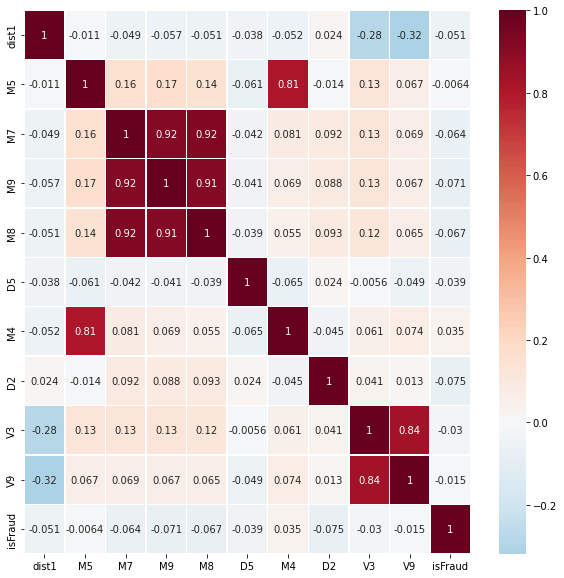

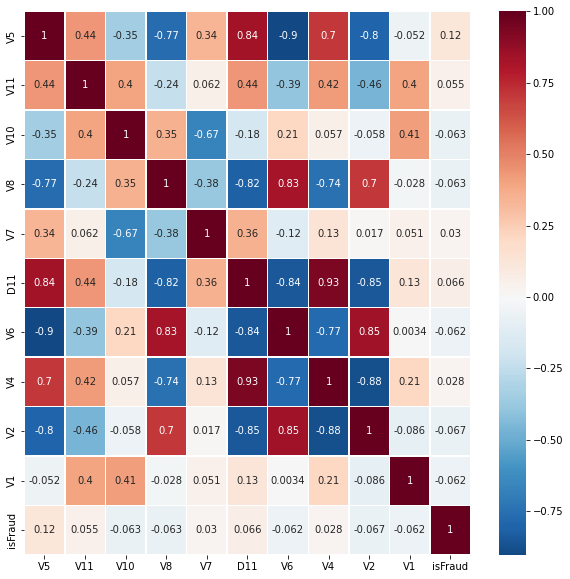

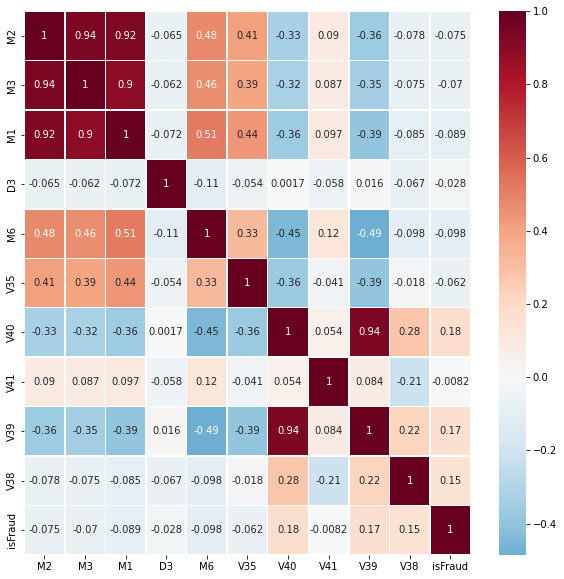

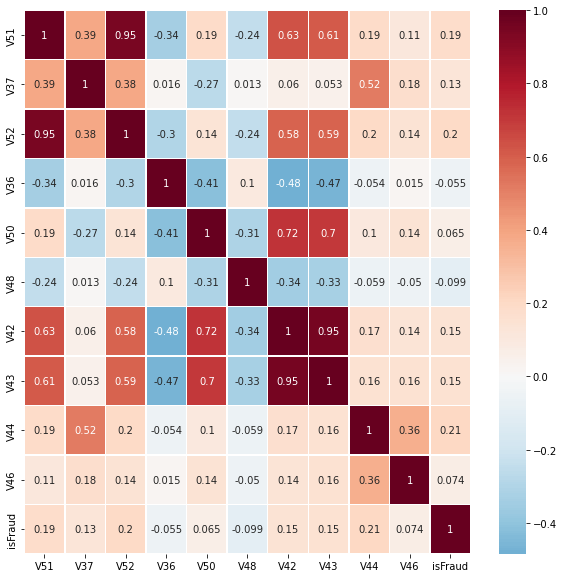

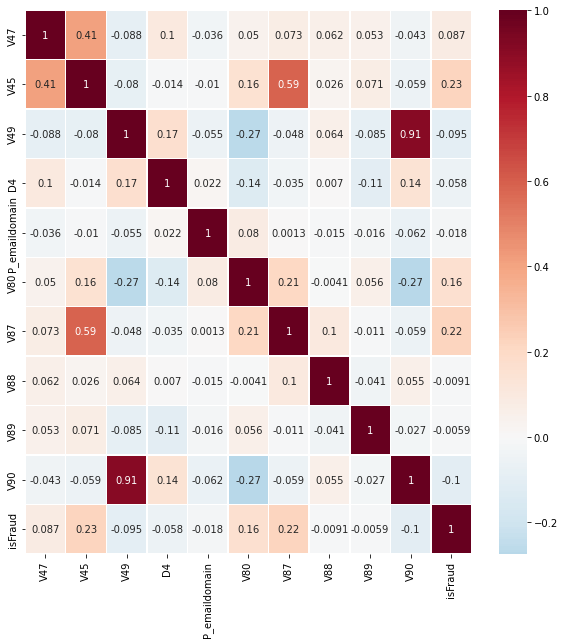

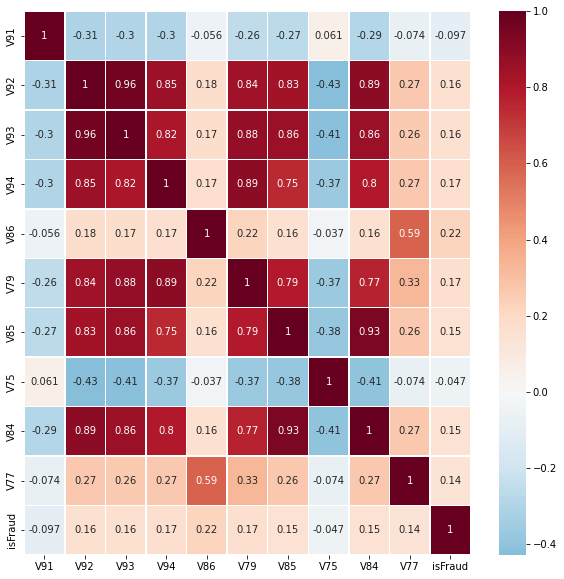

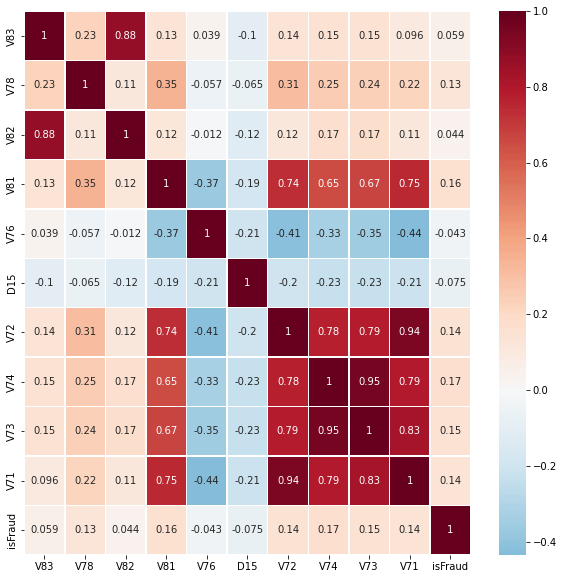

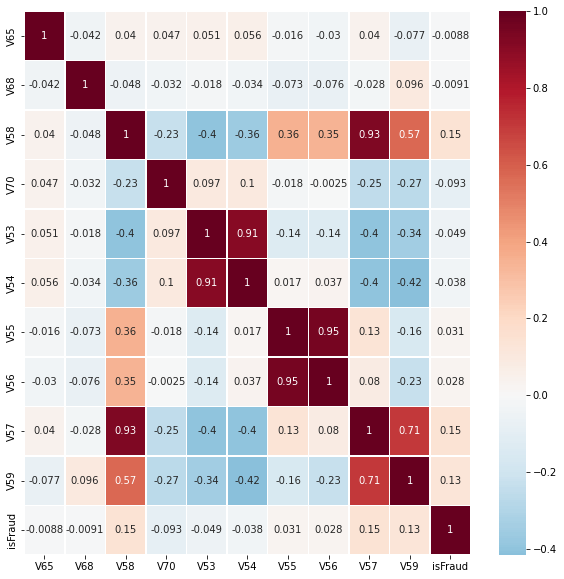

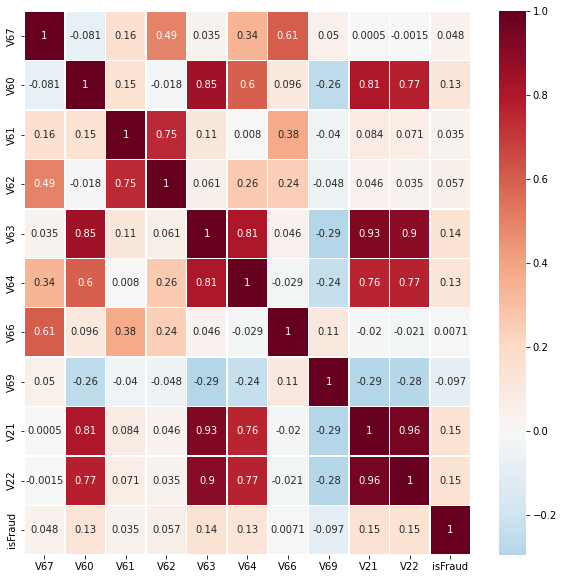

In [ ]:
for i in range(10,100,10):
   make_corr(cols[i-10:i])

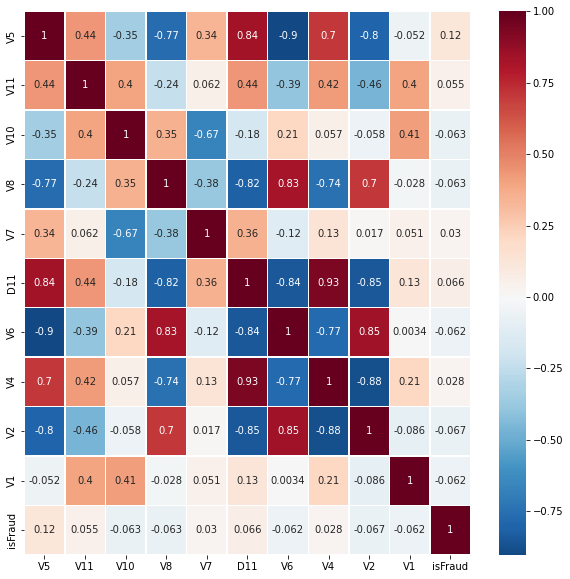

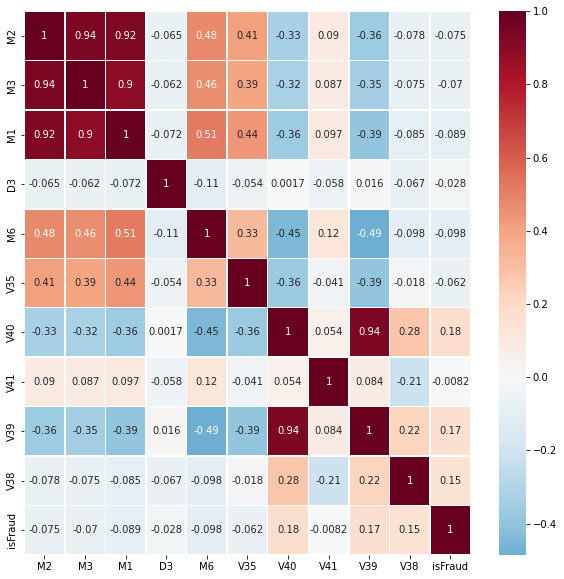

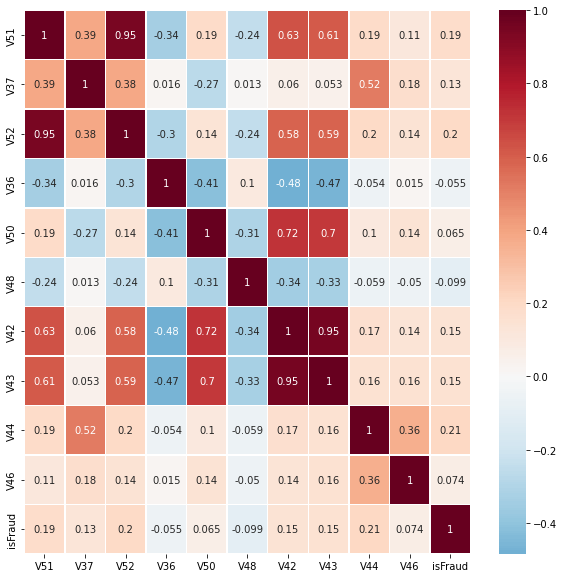

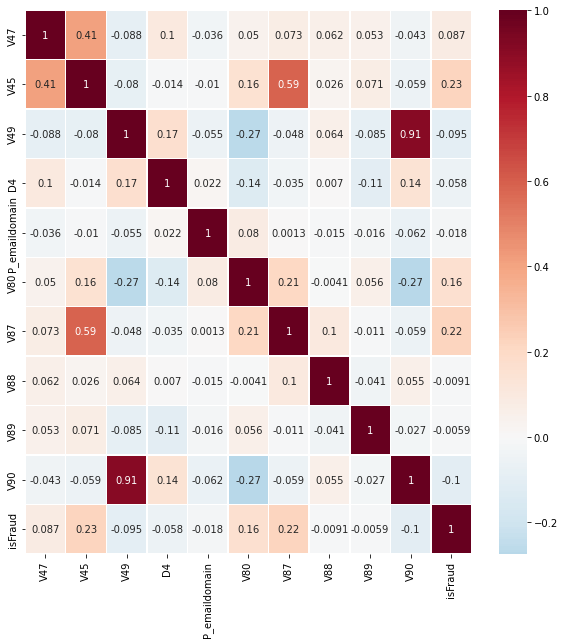

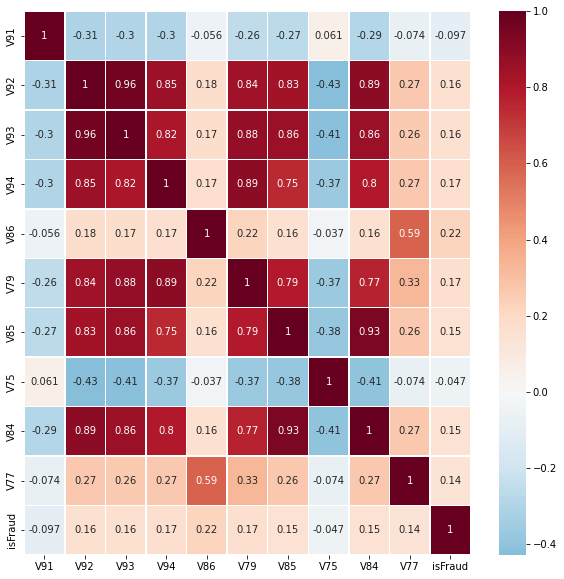

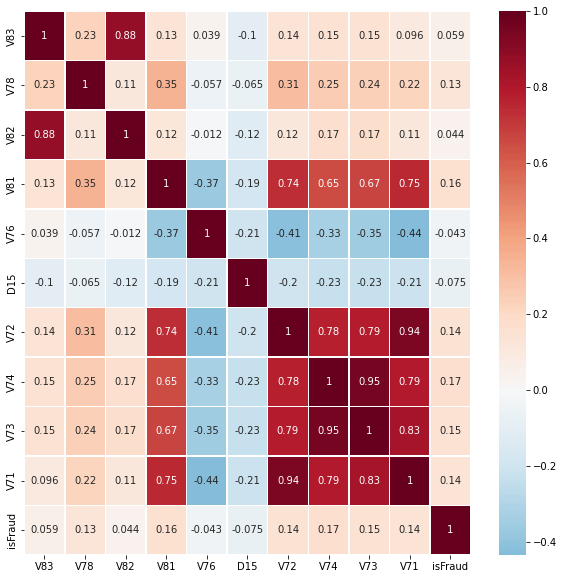

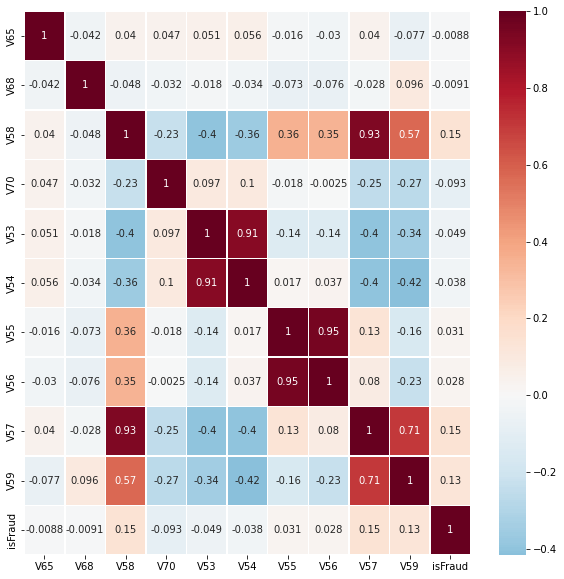

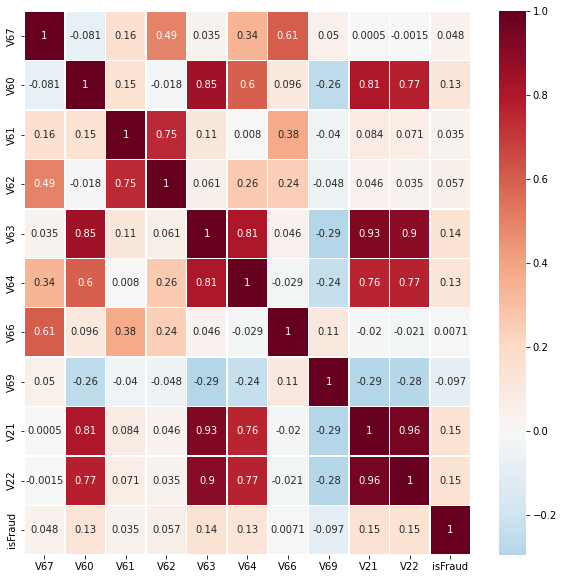

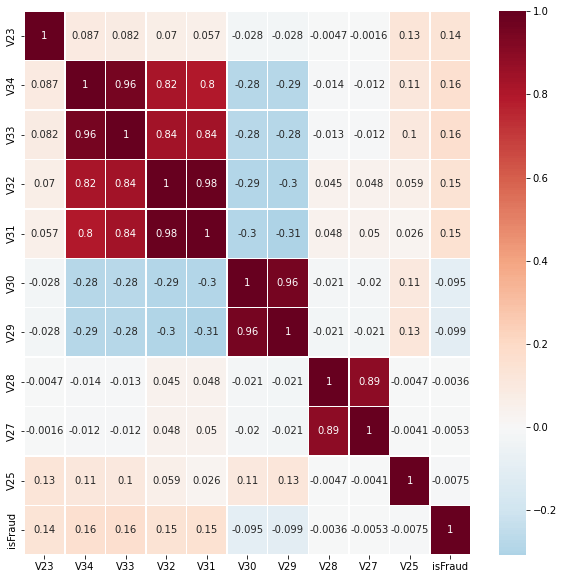

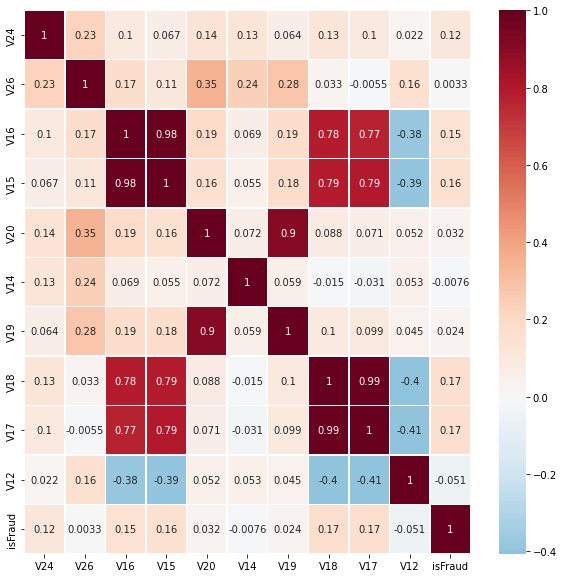

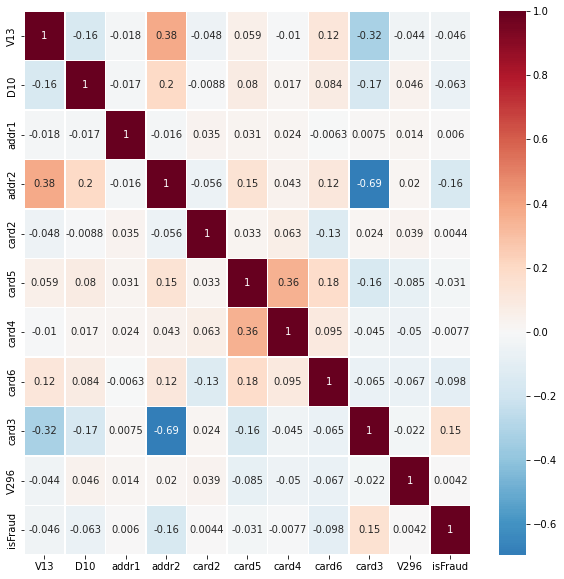

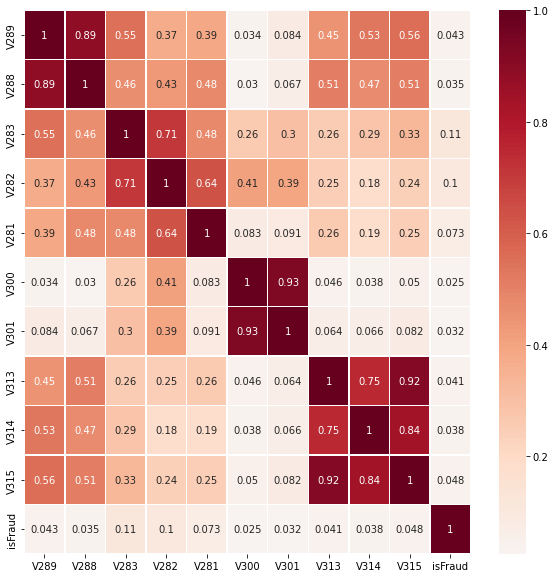

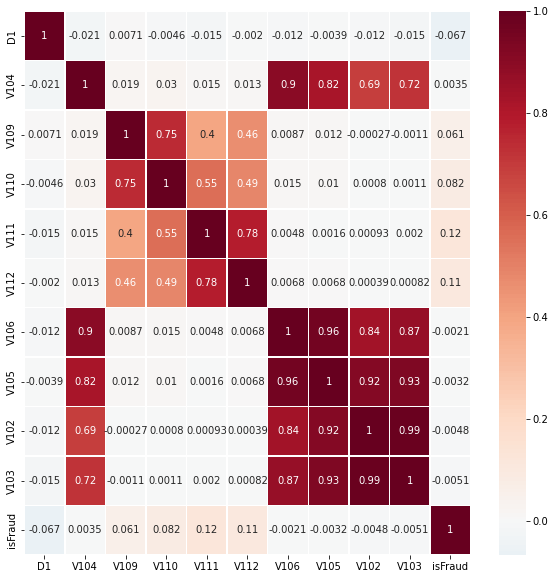

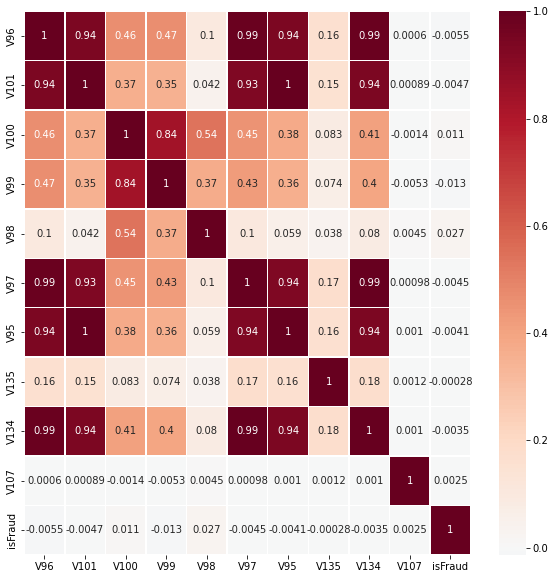

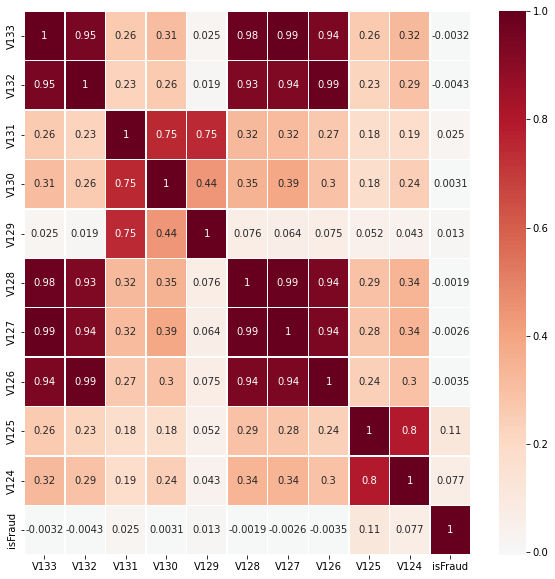

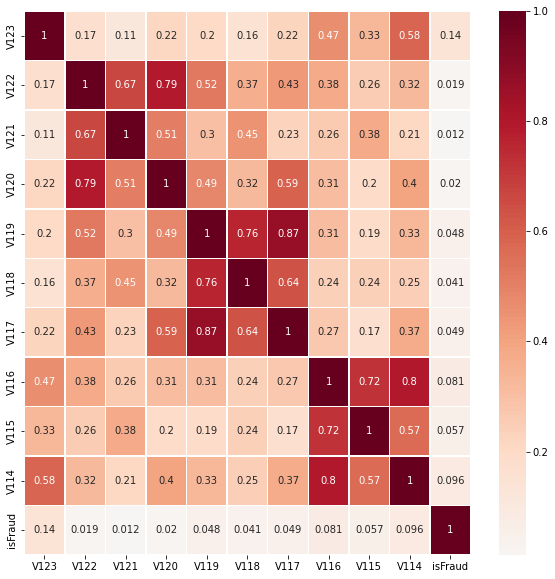

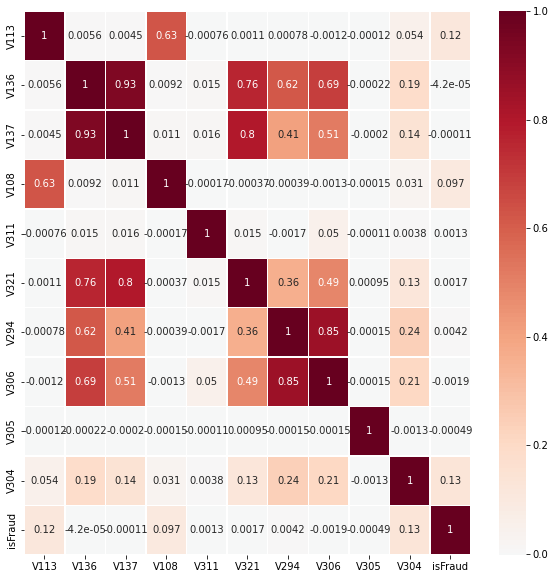

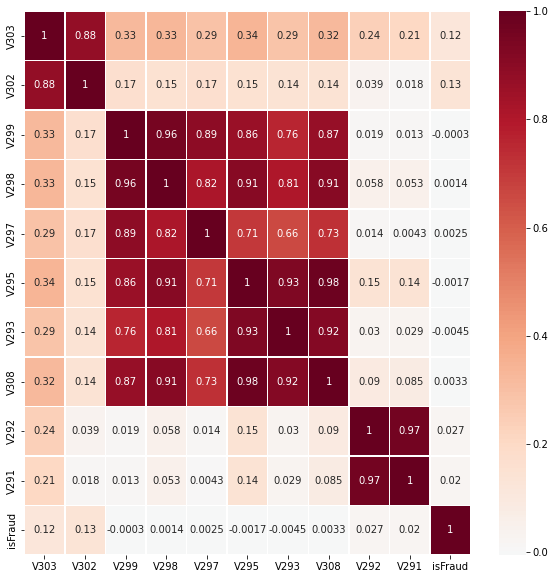

In [ ]:
for i in range(20,200,10):
   make_corr(cols[i-10:i])

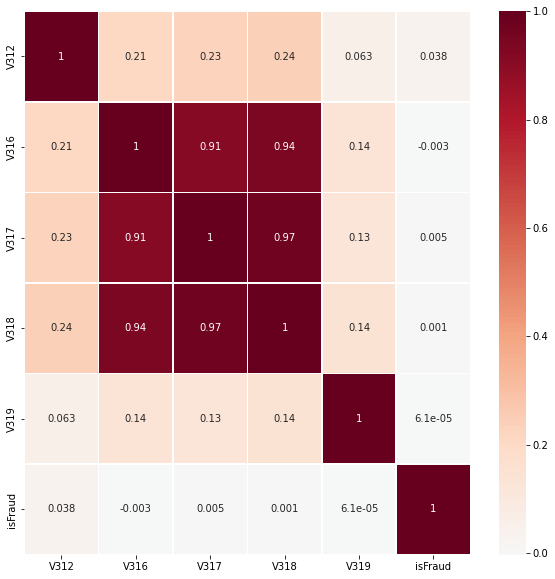

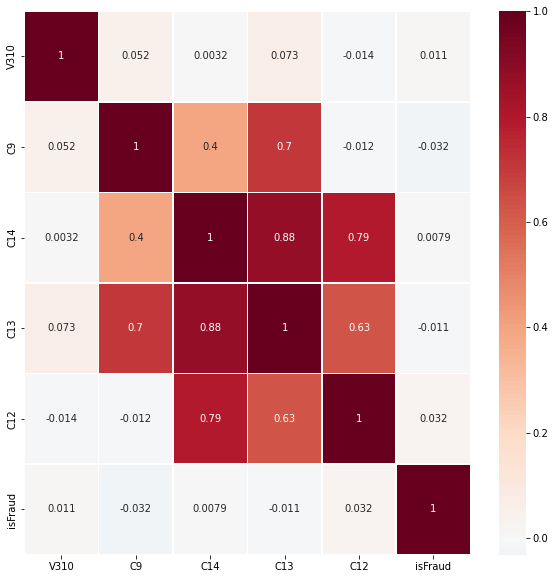

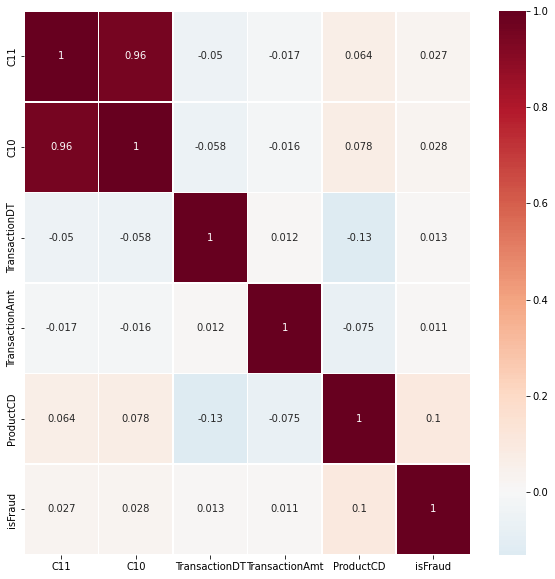

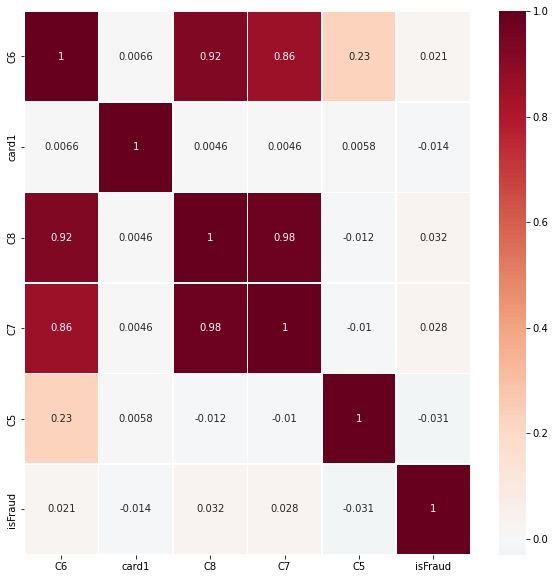

In [ ]:
for i in range(205,225,5):
   make_corr(cols[i-5:i])

In [ ]:
train[cols].to_csv('pre_fea_train.csv', index=False)

#Features with low correlation with respect to 'isFraud' and their scatter plot

In [29]:
train = pd.read_csv('pre_fea_train.csv')

In [30]:
test = pd.read_csv('imputed_test_f.csv')

In [31]:
cols = train.columns

In [32]:
cols = cols.to_list()

In [33]:
len(cols)

226

In [34]:
correlation = train[cols].corr()

In [35]:
correlation_list = correlation['isFraud']

In [36]:
correlation_list = correlation_list.sort_values(ascending=True)

In [37]:
ter = correlation_list.reset_index()

In [38]:
ter

index   isFraud
0      addr2 -0.164437
1        V90 -0.100314
2        V29 -0.099052
3        V48 -0.098974
4      card6 -0.097789
..       ...       ...
221      V44  0.207943
222      V87  0.220260
223      V86  0.222620
224      V45  0.225294
225  isFraud  1.000000

[226 rows x 2 columns]

In [39]:
ter.describe()

isFraud
count  226.000000
mean     0.039954
std      0.101721
min     -0.164437
25%     -0.006267
50%      0.016431
75%      0.103612
max      1.000000

In [40]:
ter['absolute'] = abs(ter['isFraud'])

In [41]:
low = ter.loc[(ter['isFraud'] > -0.005) &  (ter['isFraud'] < 0.005)]

In [42]:
low = low.sort_values('absolute', ascending=True)

In [43]:
low

index   isFraud  absolute
84    V136 -0.000042  0.000042
85    V319  0.000061  0.000061
83    V137 -0.000115  0.000115
82    V135 -0.000276  0.000276
81    V299 -0.000304  0.000304
80    V305 -0.000492  0.000492
79    V280 -0.000782  0.000782
86    V318  0.000997  0.000997
87    V311  0.001289  0.001289
88    V298  0.001433  0.001433
89    V321  0.001675  0.001675
78    V295 -0.001682  0.001682
77    V306 -0.001863  0.001863
76    V128 -0.001929  0.001929
75    V106 -0.002090  0.002090
90    V107  0.002526  0.002526
91    V297  0.002535  0.002535
74    V127 -0.002628  0.002628
73    V316 -0.002960  0.002960
92    V130  0.003074  0.003074
72    V133 -0.003164  0.003164
71    V105 -0.003228  0.003228
93    V308  0.003253  0.003253
94     V26  0.003286  0.003286
95    V104  0.003483  0.003483
70    V134 -0.003510  0.003510
69    V126 -0.003544  0.003544
68     V28 -0.003642  0.003642
67    V279 -0.003751  0.003751
66     V95 -0.004118  0.004118
96    V296  0.004182  0.004182
97    V294  0.004235  0.004235
65    V132 -0.004261  0.004261
98   card2  0.004382  0.004382
99    V286  0.004403  0.004403
64     V97 -0.004489  0.004489
63    V293 -0.004501  0.004501
62    V101 -0.004710  0.004710
61    V102 -0.004846  0.004846
100   V320  0.004968  0.004968

In [44]:
low_correlation = low['index'][:10]

In [45]:
low_correlation = low_correlation.to_list()

In [46]:
import seaborn as sns

def scatter(feature):
    sns.scatterplot(x=train.index, y=feature, hue='isFraud', data=train)
    plt.show()

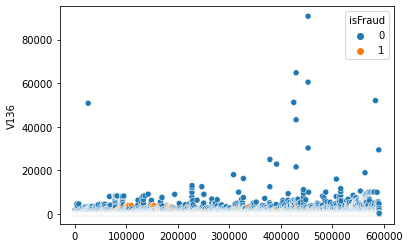

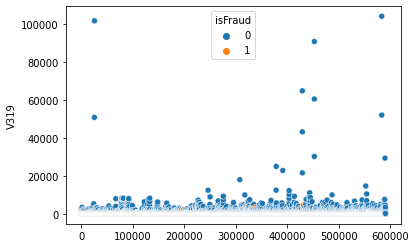

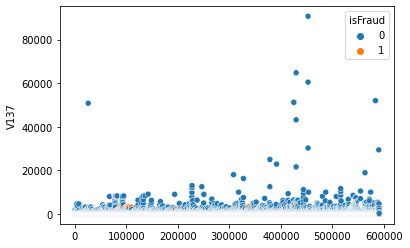

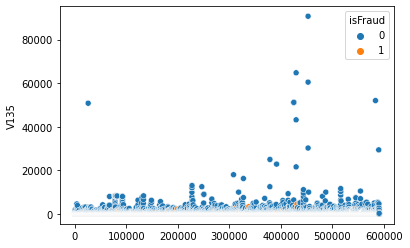

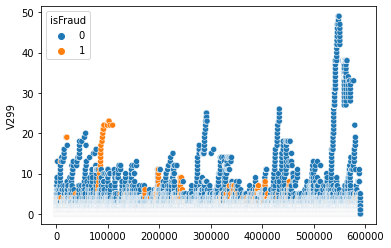

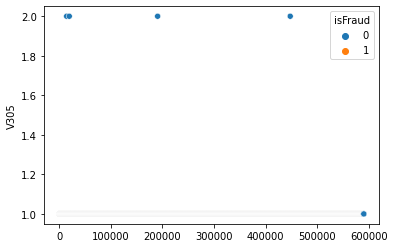

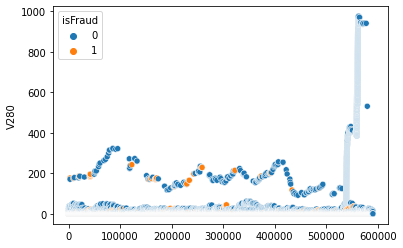

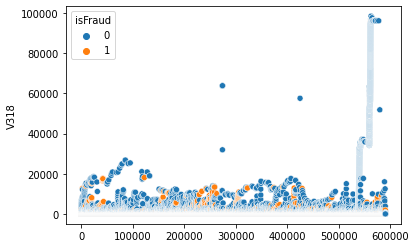

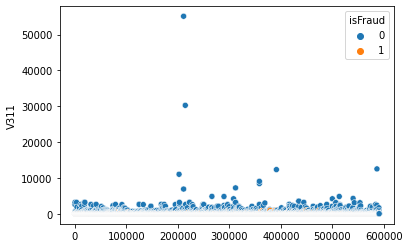

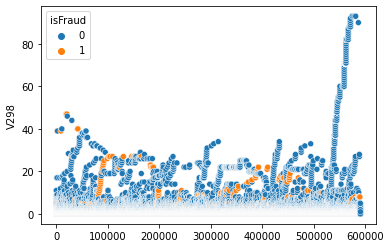

In [47]:
for tt in low_correlation:
    scatter(tt)

# PDF &  CDF of highly correlated features

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
def study_cdf(train, feature):
    ser = ''.join(feature)
    fraud_1 = train.loc[train["isFraud"] == 0]
    fraud_2 = train.loc[train["isFraud"] == 1]

    counts, bin_edges = np.histogram(fraud_1[ser], bins=100, 
                                 density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)

    counts, bin_edges = np.histogram(fraud_2[ser], bins=100, 
                                 density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.xlabel("Fraud")
    plt.ylabel("Percentile")
    plt.title("CDF & PDF of feature" + ' ' + ser)
    plt.legend(["PDF - Not Fraud"," CDF - Not Fraud","PDF - Fraud"," CDF - Fraud"])
    plt.show()

In [50]:
high = ter.loc[ter['absolute'] > 0.120]

In [51]:
high = high.sort_values('absolute', ascending=False)

In [52]:
high_correlation = high['index'][:11]

In [53]:
high_correlation = high_correlation.to_list()

In [54]:
high_correlation.remove('isFraud')

In [55]:
high_correlation

['V45', 'V86', 'V87', 'V44', 'V52', 'V51', 'V40', 'V79', 'V94', 'V17']

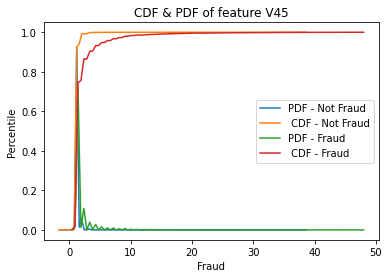

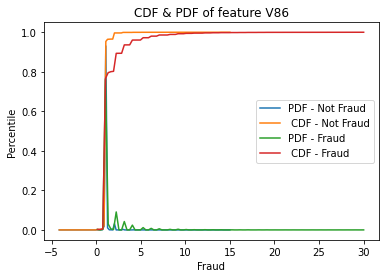

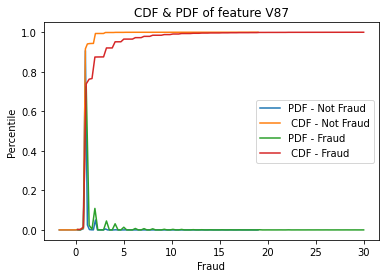

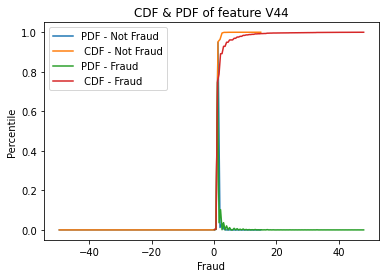

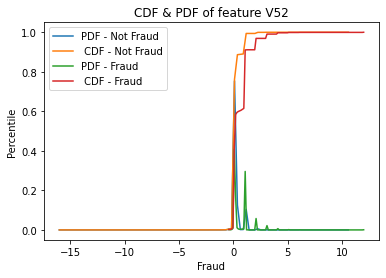

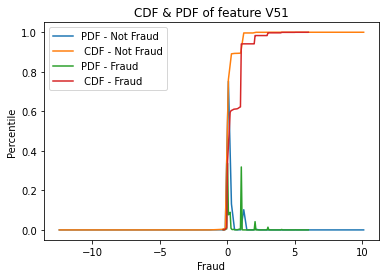

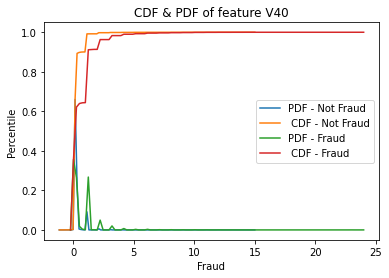

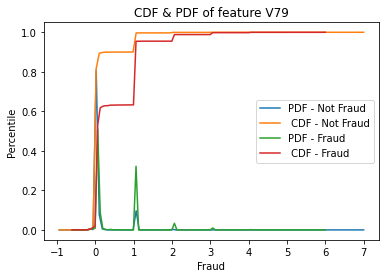

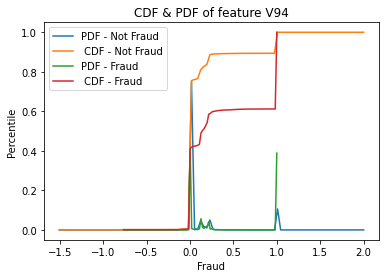

In [56]:
for i in range(0,9):
   study_cdf(train, high_correlation[i])

#Feature engineering on low correlated features

In [57]:
train[low_correlation]

V136        V319        V137        V135  ...  V280   V318  V311  V298
0         0.000000    0.000000    0.000000    0.000000  ...   0.0    0.0   0.0   0.0
1         0.000000    0.000000    0.000000    0.000000  ...   0.0    0.0   0.0   0.0
2         0.000000    0.000000    0.000000    0.000000  ...   0.0    0.0   0.0   0.0
3         0.000000    0.000000    0.000000    0.000000  ...  28.0  790.0   0.0   0.0
4         0.000000    0.000000    0.000000    0.000000  ...   0.0    0.0   0.0   0.0
...            ...         ...         ...         ...  ...   ...    ...   ...   ...
590535    0.000000    0.000000    0.000000    0.000000  ...   0.0    0.0   0.0   0.0
590536    0.000000    0.000000    0.000000    0.000000  ...   0.0    0.0   0.0   0.0
590537    0.000000    0.000000    0.000000    0.000000  ...   0.0    0.0   0.0   0.0
590538    0.000000    0.000000    0.000000    0.000000  ...   1.0    0.0   0.0   0.0
590539  279.950012  279.950012  279.950012  279.950012  ...   1.0    0.0   0.0   1.0

[590540 rows x 10 columns]

Creating new features by multiplying cos * sin of features

In [58]:
sc_list = []
for i in low_correlation:
    fea_sc = i + 'sincos'
    train[fea_sc] = np.cos(train[i]) * np.sin(train[i])
    sc_list.append(fea_sc)

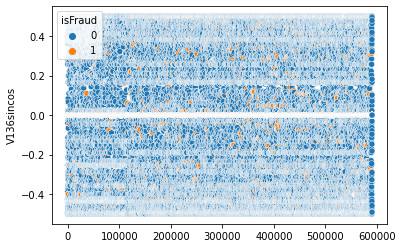

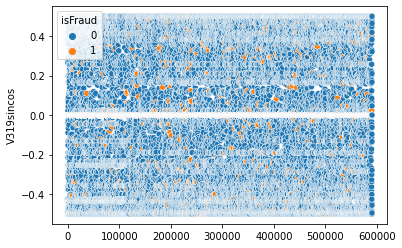

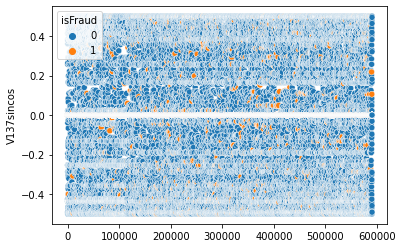

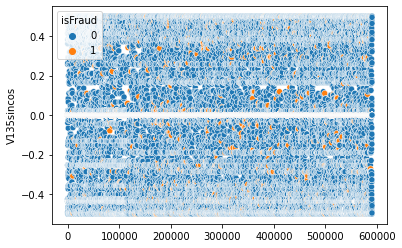

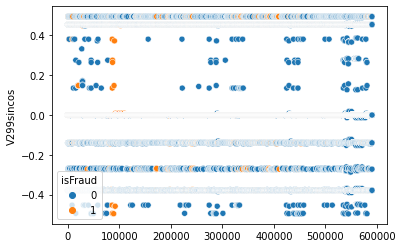

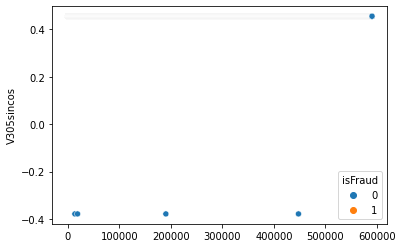

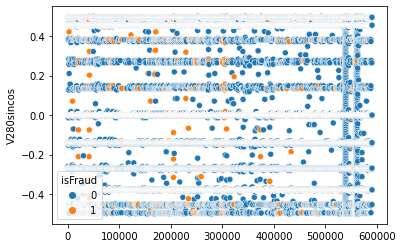

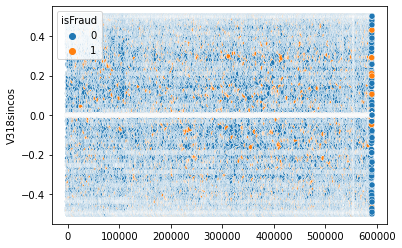

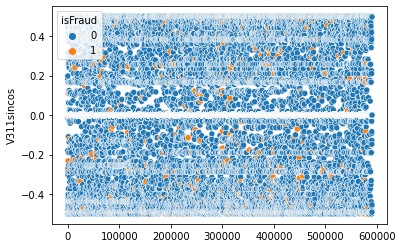

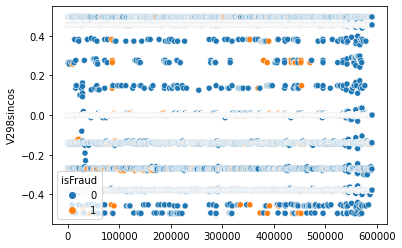

In [59]:
for gg in sc_list:
    scatter(gg)

In [60]:
test_sc_list = []
for i in low_correlation:
    fea_sc = i + 'sincos'
    test[fea_sc] = np.cos(test[i]) * np.sin(test[i])
    test_sc_list.append(fea_sc)

# Creating UID and training GBDT 

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gb_train = train.drop(['TransactionID','TransactionDT'], axis=1)

In [63]:
Y = gb_train['isFraud']
X = gb_train.drop('isFraud', axis = 1)

In [64]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.001, max_depth=5)

In [65]:
clf.fit(X,Y)

GradientBoostingClassifier(learning_rate=0.001, max_depth=5)

In [66]:
data = pd.DataFrame({'feature_importance': clf.feature_importances_,                            
'feature_names': X.columns}).sort_values(by=['feature_importance'], ascending=False)            #making dataframe for feature importance

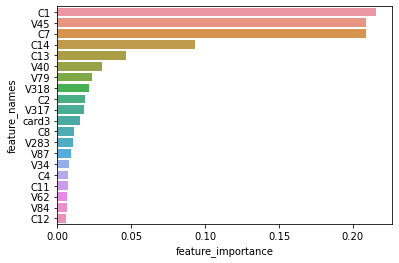

In [67]:
data_f = data[:20]
sns.barplot(x=data_f['feature_importance'], y=data_f['feature_names'])                           #taking top 20 features

Top 3 features are :- C1, V45, C7

In [68]:
train_transactions = pd.read_csv('train_transaction.csv')
test_transactions = pd.read_csv('test_transaction.csv')

In [69]:
train_identity = pd.read_csv('train_identity.csv')
test_identity = pd.read_csv('test_identity.csv')

In [70]:
train_og = train_transactions.merge(train_identity, on='TransactionID', how='left')           #merging train transactions and identity csvs on TransactionID
test_og = test_transactions.merge(test_identity, on='TransactionID', how='left')

In [71]:
train['tday'] = train_og['TransactionDT']/(24*60*60)
test['tday'] = test_og['TransactionDT']/(24*60*60)

Using P_emaildomain and ProductCD in UID because it will be useful for identifying individual clients. <BR>
<BR>
Using M5 in UID because it has good feature importance in categorical features

In [72]:
train['uid'] = train['P_emaildomain'].astype(str) + '_' + train['M5'].astype(str) + '_' + train['ProductCD'].astype(str)

In [73]:
test['uid'] = test['P_emaildomain'].astype(str) + '_' + test['M5'].astype(str) + '_' + test['ProductCD'].astype(str)

#Creating aggregate features based on UID and feature importance

Using top 10 values according to feature importance to create new features by grouping on UID and then calculating their mean, sum and standard deviation. 

In [74]:
top_10 = data_f['feature_names'][:10].values

In [75]:
def new_features(train, feature):
     train[feature + 'mean'] = train.groupby('uid', as_index=False)[feature].transform('mean')
     train[feature + 'sum'] = train.groupby('uid', as_index=False)[feature].transform('sum')
     train[feature + 'std'] = train.groupby('uid', as_index=False)[feature].transform('std')

In [76]:
from tqdm import tqdm
newf_list = []

for i in tqdm(top_10):
    fea = ''.join(i)
    new_features(train, fea)
    new_features(test, fea)
    newf_list.append(fea + 'mean') 
    newf_list.append(fea + 'sum')
    newf_list.append(fea + 'std')

100%|██████████| 10/10 [01:14<00:00,  7.47s/it]


Creating Transaction count feature based on UID's.

In [77]:
train['TransactionAmtcount'] = train.groupby('uid', as_index=False)['TransactionAmt'].transform('count')
test['TransactionAmtcount'] = test.groupby('uid', as_index=False)['TransactionAmt'].transform('count')

In [78]:
pre_train = train.drop(['TransactionID','TransactionDT'], axis=1)

In [79]:
pre_test = test.drop(['TransactionDT', 'TransactionID'], axis = 1)

In [80]:
pre_train.shape, pre_test.shape

((590540, 267), (506691, 266))

In [81]:
pre_train.to_csv("pre_bal_train2.csv", index=False)
pre_test.to_csv("pre_bal_test2.csv", index=False)

#Using SMOTE for oversampling 

In [4]:
train = pd.read_csv('pre_bal_train2.csv')

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
smo = SMOTE()

In [15]:
cols_l = train.columns
cols_l = cols_l.to_list()

In [16]:
cols_l.remove('isFraud')
cols_l.remove('uid')

In [21]:
percent_missing = train.isnull().sum() * 100 / len(train)                        #calculating percentage missing values in columns and then making a dataframe from it
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})

In [23]:
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

In [28]:
missing_value_df[:15]    #missing values in all the standard deviation calculated features

column_name  percent_missing
C14std       C14std         0.001693
V318std     V318std         0.001693
V45std       V45std         0.001693
C13std       C13std         0.001693
C1std         C1std         0.001693
V40std       V40std         0.001693
C7std         C7std         0.001693
V79std       V79std         0.001693
C2std         C2std         0.001693
V317std     V317std         0.001693
V113           V113         0.000000
V136           V136         0.000000
V137           V137         0.000000
V114           V114         0.000000
V108           V108         0.000000

In [29]:
rev = []
for yt in range(len(missing_value_df)):
     if missing_value_df['percent_missing'][yt] != 0:
        rev.append(missing_value_df['column_name'][yt])

In [35]:
cols_l = list(set(cols_l) - set(rev))         #removing columns containing missing values

In [36]:
smo_train = train[cols_l].astype(float)

In [37]:
bal_x, bal_y = smo.fit_resample(smo_train, train['isFraud'])      #oversampling using SMOTE

In [38]:
bal_y.value_counts()

1    569877
0    569877
Name: isFraud, dtype: int64

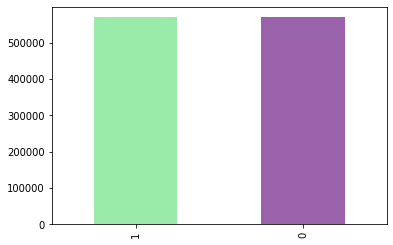

In [39]:
bal_y.value_counts().plot.bar(color=['#9AEAAA','#9A62AA'] )      #now the target feature is balanced

In [40]:
bal_x.to_csv('smote_x.csv', index=False)
bal_y.to_csv('smote_y.csv', index=False)

#Random oversampling 

In [41]:
from imblearn.over_sampling import RandomOverSampler 

In [42]:
ranover = RandomOverSampler(random_state=42)

In [43]:
ran_train = train[cols_l].astype(float)

In [44]:
X_ro, y_ro = ranover.fit_resample(ran_train, train['isFraud'])

In [45]:
y_ro.value_counts()

1    569877
0    569877
Name: isFraud, dtype: int64

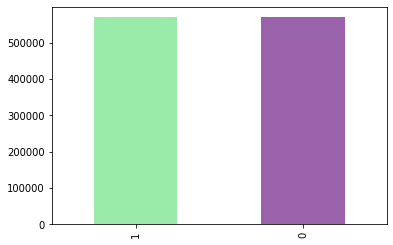

In [46]:
y_ro.value_counts().plot.bar(color=['#9AEAAA','#9A62AA'] )   

In [53]:
X_ro.to_csv('randomover_x.csv', index=False)
y_ro.to_csv('randomover_y.csv', index=False)

#Random undersampling

In [47]:
from imblearn.under_sampling import RandomUnderSampler 

In [54]:
ranunder = RandomUnderSampler(random_state=42)

In [55]:
run_train = train[cols_l].astype(float)

In [57]:
X_run, y_run = ranunder.fit_resample(run_train, train['isFraud'])

In [58]:
y_run.value_counts()

1    20663
0    20663
Name: isFraud, dtype: int64

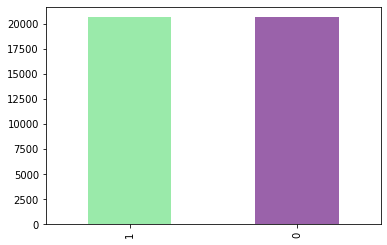

In [59]:
y_run.value_counts().plot.bar(color=['#9AEAAA','#9A62AA'] )   

In [60]:
X_run.to_csv('randomunder_x.csv', index=False)
y_run.to_csv('randomunder_y.csv', index=False)